<a href="https://colab.research.google.com/github/Sowmya-Dadheech/Time_Series_Analysis/blob/main/TSA_EXP_9_Volatility.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Volatility models - ARCH and GARCH**

In [ ]:
import pandas as pd

df = pd.read_csv('/content/FB.csv')

In [ ]:
df.head()

,Date,Open,High,Low,Close,Adj Close,Volume
0,2014-12-08,76.180000,77.250000,75.400002,76.519997,76.519997,25733900
1,2014-12-09,75.199997,76.930000,74.779999,76.839996,76.839996,25358600
2,2014-12-10,76.650002,77.550003,76.070000,76.180000,76.180000,32210500
3,2014-12-11,76.519997,78.519997,76.480003,77.730003,77.730003,33462100
4,2014-12-12,77.160004,78.879997,77.019997,77.830002,77.830002,28091600


In [ ]:
import numpy as np
from sklearn import metrics


def timeseries_evaluation_metrics_func(y_true, y_pred , model_name):

    def mean_absolute_percentage_error(y_true, y_pred):
        y_true, y_pred = np.array(y_true), np.array(y_pred)
        return np.mean(np.abs((y_true - y_pred) / y_true)) * 100
    print(f'Evaluation metric results for {model_name}:-')
    print(f'MSE is : {metrics.mean_squared_error(y_true, y_pred)}')
    print(f'MAE is : {metrics.mean_absolute_error(y_true, y_pred)}')
    print(f'RMSE is : {np.sqrt(metrics.mean_squared_error(y_true, y_pred))}')
    print(f'MAPE is : {mean_absolute_percentage_error(y_true, y_pred)}')
    print(f'R2 is : {metrics.r2_score(y_true, y_pred)}',end='\n\n')

In [ ]:
!pip install arch -q

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 981.7/981.7 kB 12.2 MB/s eta 0:00:00


In [ ]:
from arch import arch_model

In [ ]:
def exp9(column_name,p,q):
  print("\n",column_name, "Graph")
  df[column_name].plot(figsize=(15, 6))
  plt.xlabel("Date")
  plt.ylabel(column_name)
  plt.title(column_name)
  plt.show()

  new_df = df[column_name]

  print("\nPACF Graph")
  plot_pacf(new_df)
  plt.show()

  test_size = 30
  train, test = new_df[:-test_size], new_df[-test_size:]

  model = arch_model(train, p=p, q=q)
  model_fit = model.fit()
  print(model_fit.summary())
  forecast = model_fit.forecast()
  # forecast = pd.DataFrame(forecast,columns=['close_pred'])
  return forecast

def predict_volatility(column_name, p, q):
  new_df = df[column_name]
  rolling_predictions = []
  test_size = 30

  for i in range(test_size):
    train = new_df[:-(test_size-i)]

    model = arch_model(train, p=p, q=q)
    model_fit = model.fit(disp='off')
    pred = model_fit.forecast(horizon=1)
    rolling_predictions.append(np.sqrt(pred.variance.values[-1,:][0]))

  rolling_predictions = pd.Series(rolling_predictions, index=new_df.index[-test_size:])
  # print(rolling_predictions)

  plt.figure(figsize=(10,4))
  true, = plt.plot(df[column_name][-test_size:])
  preds, = plt.plot(rolling_predictions)
  plt.title(f'Volatility Prediction - Rolling forecast for GARCH[{p}, {q}]', fontsize=20)
  plt.legend([ 'True Volatility', 'Predicted Volatility'], fontsize=16)
  return rolling_predictions


 Close Graph


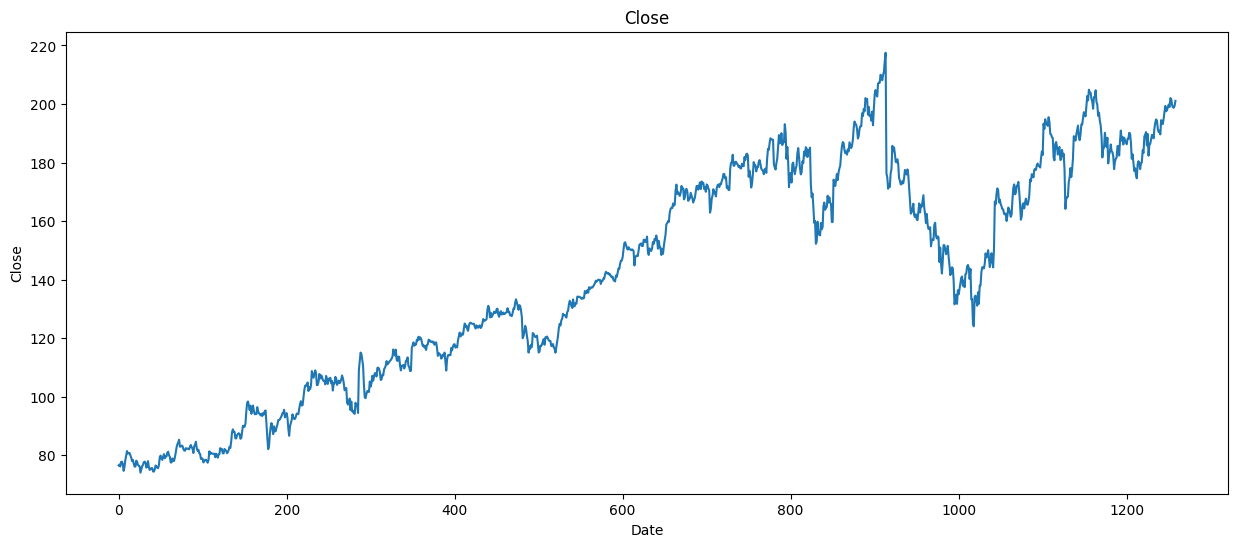


PACF Graph


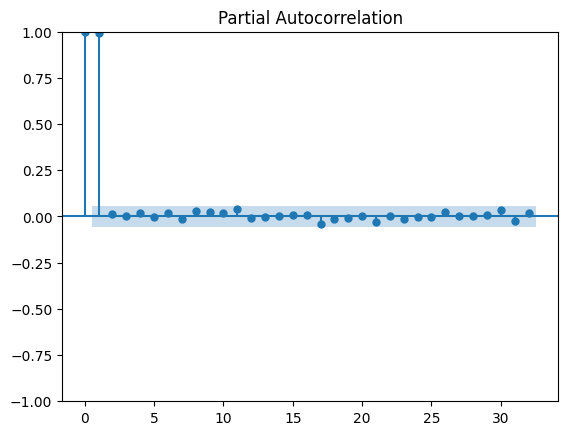

Iteration:      1,   Func. Count:      7,   Neg. LLF: 36237.47066500972
Iteration:      2,   Func. Count:     15,   Neg. LLF: 5783.222254347955
Iteration:      3,   Func. Count:     21,   Neg. LLF: 5809.9142349933845
Iteration:      4,   Func. Count:     28,   Neg. LLF: 5779.058316877207
Iteration:      5,   Func. Count:     34,   Neg. LLF: 5802.8010782927895
Iteration:      6,   Func. Count:     42,   Neg. LLF: 5796.501492153291
Iteration:      7,   Func. Count:     49,   Neg. LLF: 5787.559792196464
Iteration:      8,   Func. Count:     56,   Neg. LLF: 5770.738523138469
Iteration:      9,   Func. Count:     62,   Neg. LLF: 5772.3414423002405
Iteration:     10,   Func. Count:     69,   Neg. LLF: 5770.312567434423
Iteration:     11,   Func. Count:     75,   Neg. LLF: 5770.1305683886485
Iteration:     12,   Func. Count:     81,   Neg. LLF: 5770.122127422545
Iteration:     13,   Func. Count:     87,   Neg. LLF: 5770.118545300644
Iteration:     14,   Func. Count:     93,   Neg. LLF: 5770.1

In [ ]:
import matplotlib.pyplot as plt
from statsmodels.graphics.tsaplots import plot_pacf , plot_acf

forecast = exp9("Close", 1 ,2)
print("\nPredicting volatility")

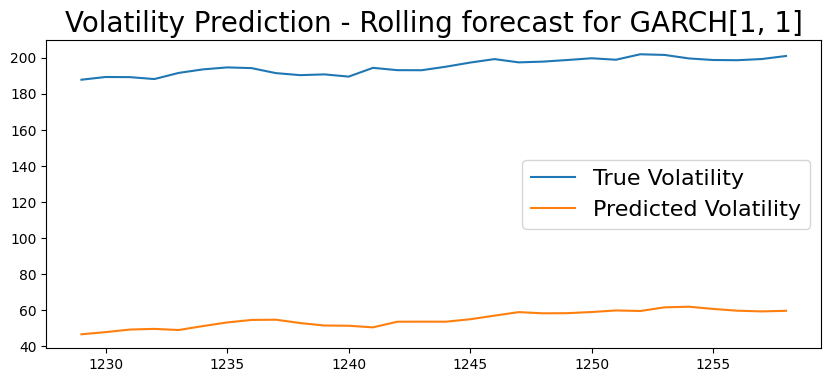

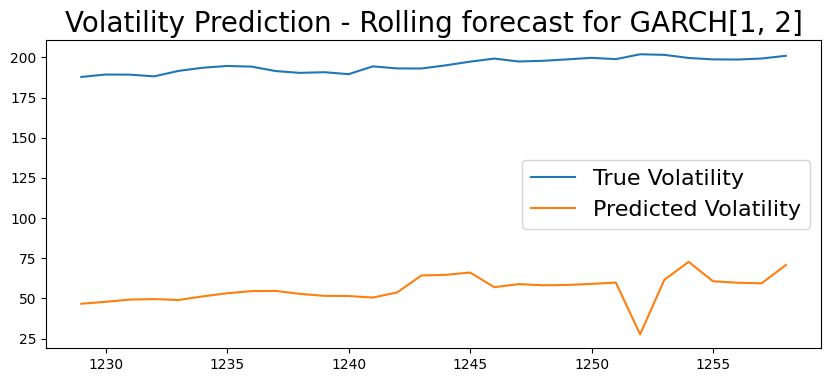

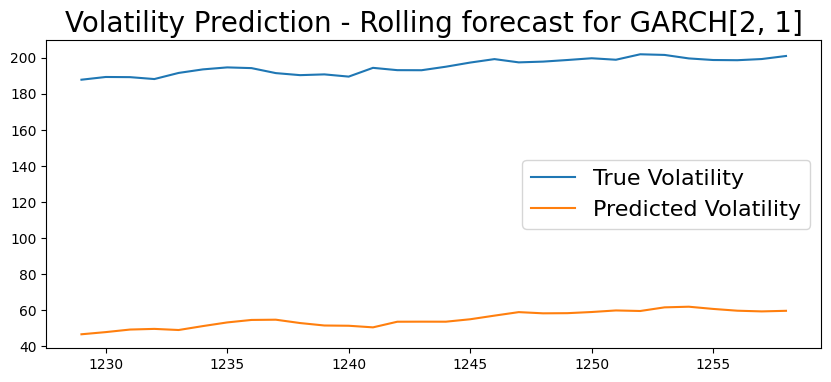

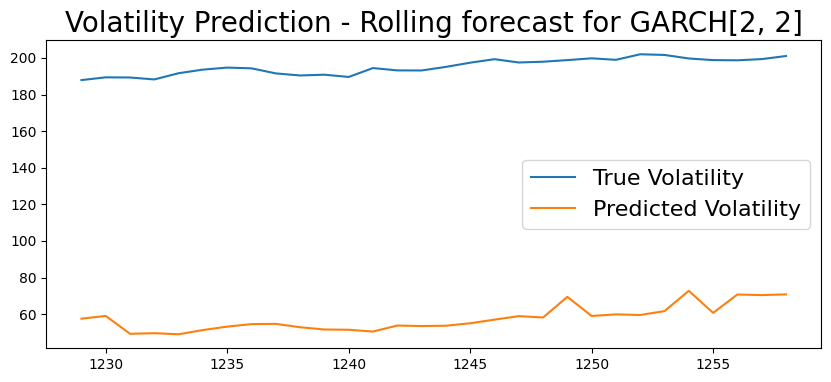

In [ ]:
for i in range(2):
  for j in range(2):
    predict_volatility("Close", i+1, j+1)

In [ ]:
X = df[['Close']]
train, test = X[0:-30], X[-30:]

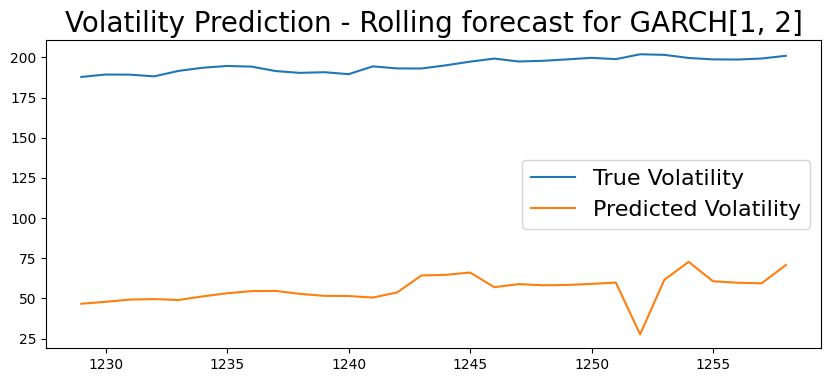

In [ ]:
forecast = predict_volatility("Close", 1, 2)

In [ ]:
timeseries_evaluation_metrics_func(test, forecast , 'ARCH/GARCH')

Evaluation metric results for ARCH/GARCH:-
MSE is : 19509.84262197758
MAE is : 139.46311032987626
RMSE is : 139.67763823167107
MAPE is : 71.40187430595944
R2 is : -1064.9490025583325

